# MNIST reinterpreted by Eli

* Basic code: https://www.tensorflow.org/overview
* plot method: https://www.tensorflow.org/tutorials/load_data/images
* visualization for mnist: https://webnautes.tistory.com/1232

## Import required module

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

## Preprocess training data
since black images are set to RGB 0-255 integer, normalize it to 0-1 range for keras model

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

### set class names
keras sequential model will automatically sort class label with alphabetical order

In [3]:
import numpy
class_names = numpy.unique(y_train)
print(class_names)

[0 1 2 3 4 5 6 7 8 9]


### test data shape

In [4]:
print(type(x_train))
print(x_train.shape)
print(x_train[1].shape)
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)
(60000,)


### train data plot

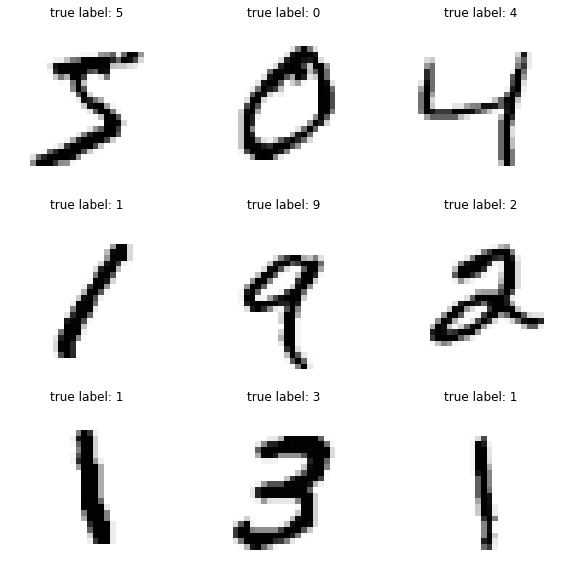

In [5]:
import matplotlib.pyplot as plt
fig1= plt.figure(figsize=(10,10))
fig1.patch.set_facecolor('xkcd:white')
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='Greys')
    plt.title('true label: {}'.format(y_train[i]))
    plt.axis('off')

## Setup keras model
each mnist image is consist of 28,28 size => pipeline 1  
pipeline 1 => make keras network with 128 units, and activation function as relu => pipeline2  
pipeline 2 => make 20% of nodes to 0 to prevent overfitting => pipeline 3  
pipeline 3 => make keras network with 10 nodes, activation function as softmax  

input size = 60000  
layer1 = 128 nodes  
output size = 10 (mnist number of label 0-9)
- [X] number of last layer should be same as the number of category unit  

category unit will be determined at future compile method: sparse_categorical_crossentropy

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

### summary of model
784+1(bias) * 128 = 100480  
128+1(bias) * 10 = 1290

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Specify optimizer and a loss function
ref: https://keras.io/getting_started/intro_to_keras_for_engineers/#training-models-with-fit  
for loss function(great article!!):  https://gombru.github.io/2018/05/23/cross_entropy_loss/  

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Start fitting process

In [9]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.4928 - accuracy: 0.85591s - loss: 0.7431 - accura - ETA: 0s - loss: 0.6594 - accuracy:  - ETA: 0s - loss: 0.6171 - accuracy: 0.81 - ETA: 0s - loss: 0.6043 - accuracy: 0.82 - ETA: 0s - loss: 0.5919 - accuracy: 0.82 - ETA: 0s - loss: 0.5808 - accuracy: 0. - ETA: 0s - loss: 0.5609 - accuracy: 0. - ETA: 0s - loss: 0.5425 - accuracy: 0.84 - ETA: 0s - loss: 0.5341 - accuracy - ETA: 0s - loss: 0.5040 - accuracy: 0.
Epoch 2/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.1498 - accuracy: 0.95531s - loss: 0.1892 - accuracy: 0.93 - ETA: 1s - loss: 0.1838 - accuracy: 0.94 - ETA: 1s - loss: 0.1785 - accuracy: 0.94 - ETA: 1s - loss: 0.1740 - accuracy - ETA: 1s - loss: 0.1629 - accuracy: 0. - ETA: 1s - loss: 0.1600 - accuracy: 0. - ETA: 1s - loss: 0.1578 - accuracy: 0.95 - ETA: 1s - loss: 0.1568 - accuracy: 0. - ETA: 1s - loss: 0.1554 - accuracy:  - ETA: 0s - loss: 0.1539 - accuracy: 0. - ETA: 0s 

## Test data

### plot test data

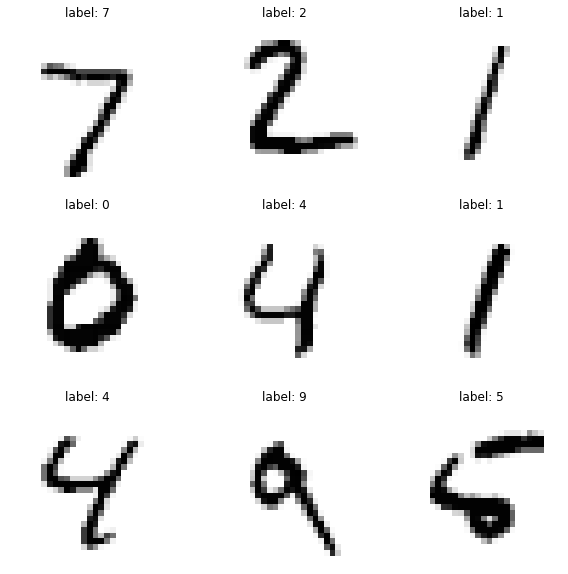

In [10]:
import matplotlib.pyplot as plt
fig2 = plt.figure(figsize=(10,10))
fig2.patch.set_facecolor('xkcd:white')
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(x_test[i],cmap='Greys')
    plt.title('label: {}'.format(y_test[i]))
    plt.axis('off')

### evaluate data

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 722us/step - loss: 0.0736 - accuracy: 0.9783


[0.07363700866699219, 0.9782999753952026]

## Predict data
shuffle ref: https://www.tensorflow.org/tutorials/load_data/csv#%ED%9B%88%EB%A0%A8_%ED%8F%89%EA%B0%80_%EB%B0%8F_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0  
shuffle using zip: https://stackoverflow.com/questions/23289547/shuffle-two-list-at-once-with-same-order

### shuffle test set

In [12]:
selectedindices = numpy.arange(x_test.shape[0])
x_sample,y_sample = x_test[selectedindices], y_test[selectedindices] # y sample is true label

### display sample size

In [13]:
print(type(x_test))
print(x_sample[:9].shape)

<class 'numpy.ndarray'>
(9, 28, 28)


### prediction

In [14]:
predictions = model.predict(x_sample[:9])
print(predictions.shape)
with numpy.printoptions(precision=2,suppress=True): # https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
    print(100*predictions)

(9, 10)
[[  0.     0.     0.     0.     0.     0.     0.   100.     0.     0.  ]
 [  0.     0.   100.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.91   0.     0.     0.     0.     0.     0.07   0.01   0.  ]
 [100.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.    99.89   0.     0.     0.     0.     0.11]
 [  0.    99.95   0.     0.     0.     0.     0.     0.05   0.     0.  ]
 [  0.     0.     0.     0.    99.97   0.     0.     0.     0.01   0.03]
 [  0.     0.     0.     0.01   0.04   0.     0.     0.     0.    99.95]
 [  0.     0.     0.     0.     0.    99.99   0.01   0.     0.     0.  ]]


### prediction of most probable class names

In [15]:
print(y_sample[:9])

[7 2 1 0 4 1 4 9 5]


#### display most probable class names using argmax (`model.predict_classes()` is deprecated)

In [16]:
prediction_classes_argmax = predictions.argmax(axis=-1)
print(prediction_classes_argmax)

[7 2 1 0 4 1 4 9 5]


### prediction with full probability map

#### define some functions to plot data
ref: https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%EC%98%88%EC%B8%A1_%EB%A7%8C%EB%93%A4%EA%B8%B0

In [17]:
def plot_image(predictions, true_label_index, img):
    # predictions,true_label,img = predictions_array[i],true_label_array[i],img_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap='Greys')
    
    predicted_label_index = numpy.argmax(predictions) # to select most probable label index
    if predicted_label_index == true_label_index:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('pred:{} {:2.0f}% (true:{})'.format(class_names[predicted_label_index], 100*numpy.max(predictions), class_names[true_label_index]), color=color)
    
def plot_value_array(predictions, true_label_index):
    plt.grid(False)
    plt.xticks(class_names)
    plt.yticks([])
    
    barplot = plt.bar(range(len(class_names)), predictions, color='#777777')
    plt.ylim([0,1])
    
    predicted_label_index = numpy.argmax(predictions)
    barplot[predicted_label_index].set_color('red')
    barplot[true_label_index].set_color('blue')

#### display all probability

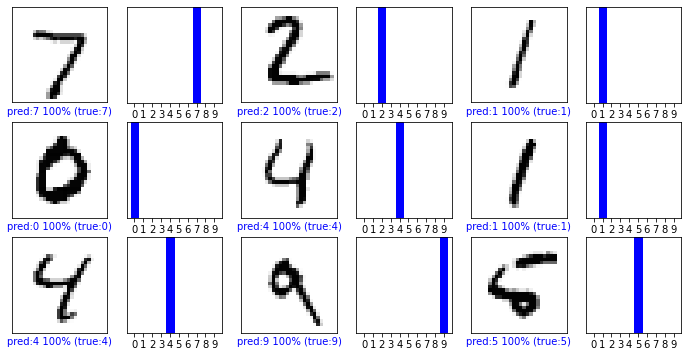

In [18]:
def plot_Nfigs(num_cols,num_rows,x_test,y_test,predictions):
    num_images = num_cols * num_rows
    figN = plt.figure(figsize=(2*2*num_cols,2*num_rows)) # first 2 is figsize, second 2 is two plots
    figN.patch.set_facecolor('xkcd:white')
    for i in range(num_images):
        plt.subplot(num_rows,2*num_cols,2*i+1)
        plot_image(predictions[i],y_test[i],x_test[i])
        plt.subplot(num_rows,2*num_cols,2*i+2)
        plot_value_array(predictions[i],y_test[i])
plot_Nfigs(3,3,x_sample,y_sample,predictions)

### Display wrong predictions

#### define wrong result finder function

In [19]:
def wrong_results(x_test,y_test):
    x_test_wrong = []
    y_test_wrong = []
    predictions_wrong = []
    correct_results = 0
    
    predictions = model.predict(x_test)
    prediction_classes_argmax = predictions.argmax(axis=-1) # predicted class_index
    
    for i in range(y_test.shape[0]): #length of samples
        if y_test[i] != prediction_classes_argmax[i]:
            x_test_wrong.append(x_test[i])
            y_test_wrong.append(y_test[i])
            predictions_wrong.append(predictions[i])
        else:
            correct_results += 1
    x_test_wrong = numpy.array(x_test_wrong)
    y_test_wrong = numpy.array(y_test_wrong)
    predicitions_wrong = numpy.array(predictions_wrong)
    return x_test_wrong, y_test_wrong, predictions_wrong, correct_results

#### plot wrong results

10000
9783
217
9


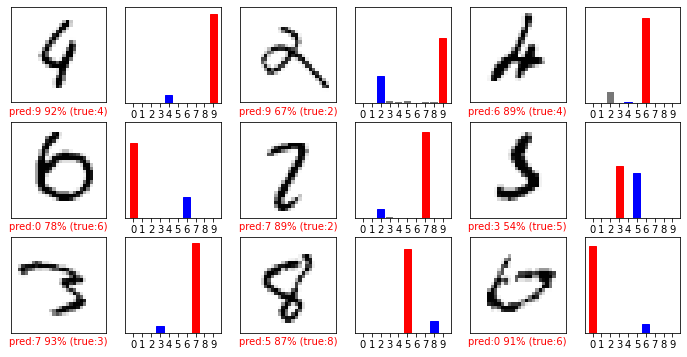

In [20]:
x_wrong, y_wrong, predictions_wrong, correct_results=wrong_results(x_test,y_test)
print(y_test.shape[0])
print(correct_results)
print(y_wrong.shape[0])

N = min(9, y_wrong.shape[0])
print(N)
if N==9:
    plot_Nfigs(3,3,x_wrong,y_wrong,predictions_wrong)